In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df = pd.read_csv('Telecom Churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [8]:
df.shape

(3333, 20)

In [9]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [10]:
df.duplicated().sum()

0

## Analyzing

In [12]:
df.Churn.value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

In [13]:
df['Churn'].unique()

array([False,  True])

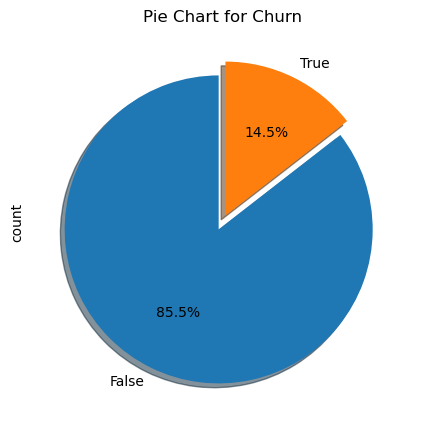

In [14]:
df["Churn"].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%', startangle=90,shadow=True,figsize=(5,5))
plt.title("Pie Chart for Churn")
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

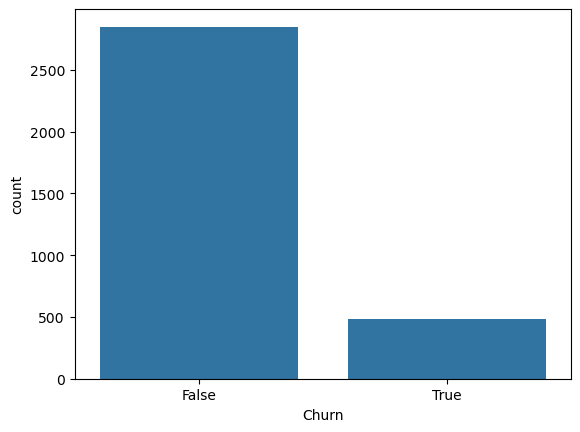

In [15]:
sns.countplot(x=df.Churn)

In [16]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [17]:
df['State'].nunique()

51

<Axes: xlabel='State', ylabel='count'>

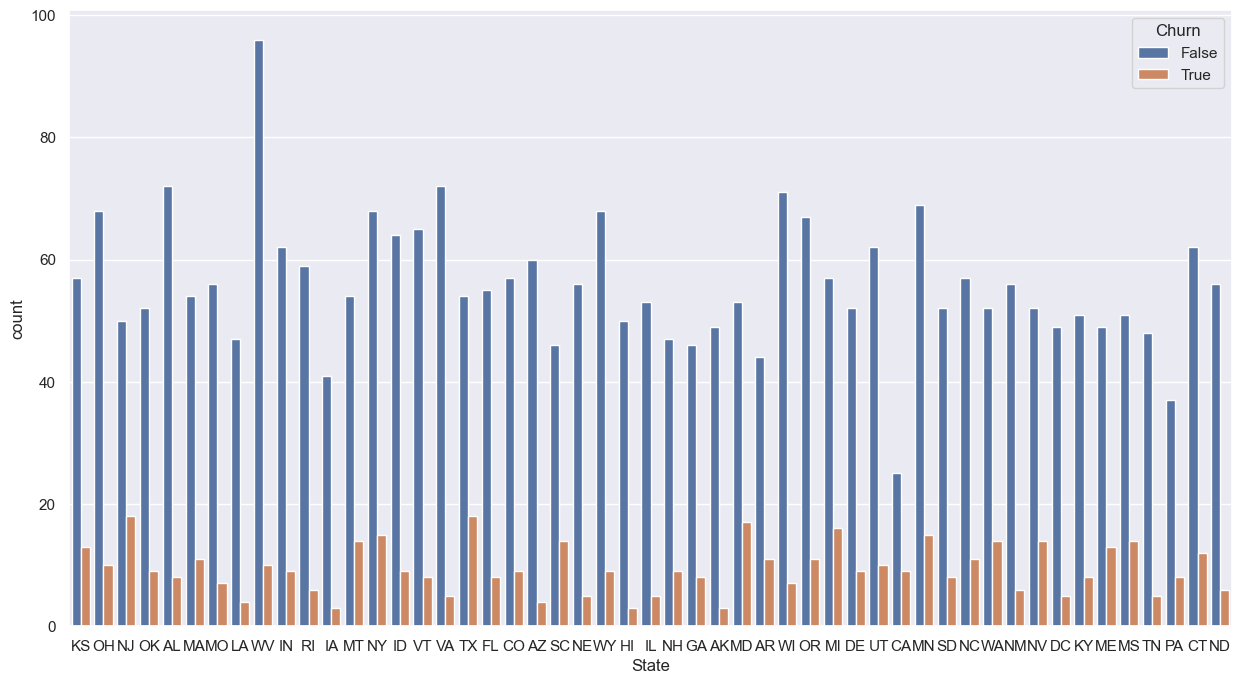

In [18]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(x=df.State, data=df, hue='Churn')

In [19]:
df.groupby(['State'])['Churn'].mean().sort_values(ascending=False).head(10)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

<Axes: xlabel='Area code', ylabel='count'>

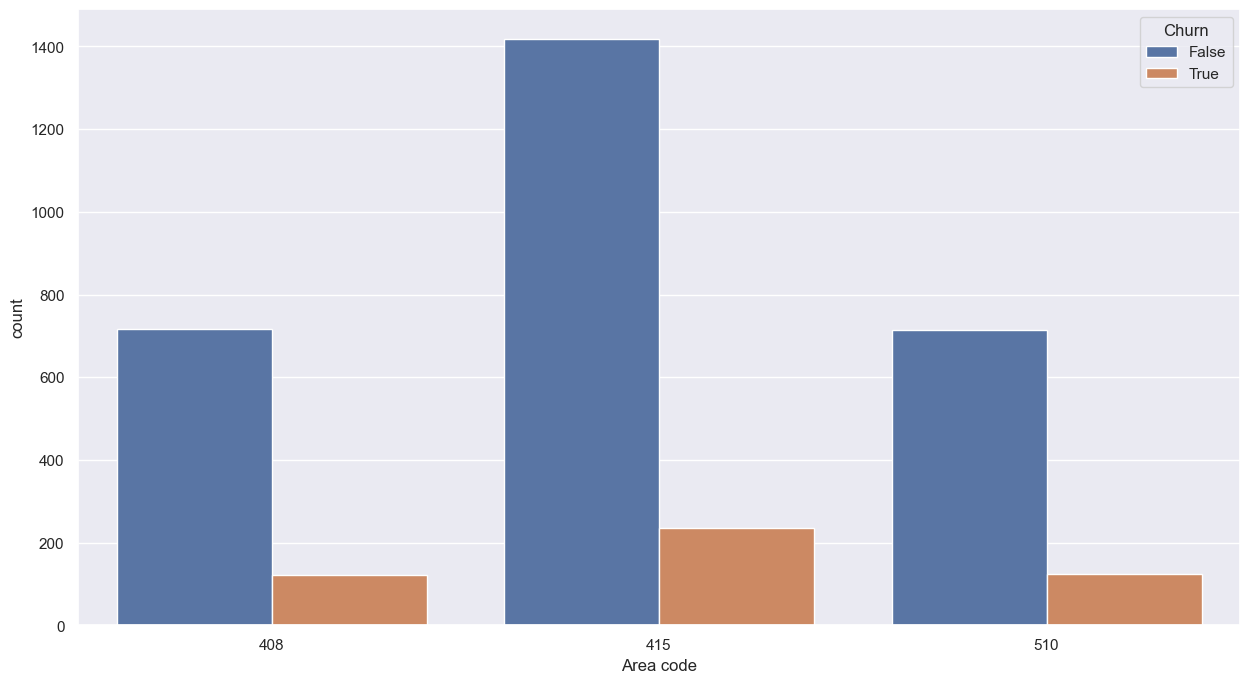

In [20]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,8))
sns.countplot(x='Area code', data=df, hue='Churn')

C:\Users\HP\AppData\Local\Temp\ipykernel_7304\3876303769.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Account length'])


<Axes: xlabel='Account length', ylabel='Density'>

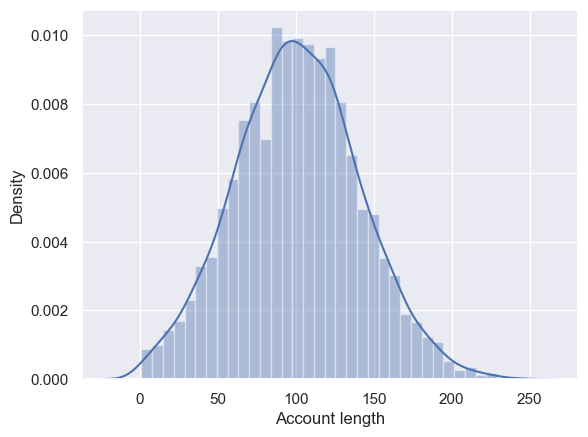

In [21]:
sns.distplot(df['Account length'])

In [22]:
International_plan_data = pd.crosstab(df["International plan"],df["Churn"])
International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(International_plan_data)

Churn               False  True  Percentage Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


C:\Users\HP\AppData\Local\Temp\ipykernel_7304\1415608847.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  International_plan_data['Percentage Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)


In [23]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [24]:
df.sample()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3235,AZ,97,408,No,Yes,25,141.0,101,23.97,212.0,85,18.02,175.2,138,7.88,4.9,2,1.32,3,False


In [25]:
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])
df['International plan'] = le.fit_transform(df['International plan'])
df['Voice mail plan'] = le.fit_transform(df['Voice mail plan'])
df.sample(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1912,30,103,408,0,0,0,150.6,125,25.60,169.1,126,14.37,221.2,104,9.95,10.4,8,2.81,8,True
3282,7,99,415,0,1,31,244.1,71,41.50,203.4,58,17.29,234.0,115,10.53,7.7,4,2.08,3,False
1401,48,112,408,0,0,0,167.8,88,28.53,247.9,81,21.07,155.1,108,6.98,11.9,4,3.21,0,False
2932,44,97,415,0,0,0,209.2,134,35.56,0.0,0,0.00,175.4,94,7.89,11.8,6,3.19,1,False
434,38,61,408,0,1,31,288.7,101,49.08,203.8,102,17.32,203.2,49,9.14,8.6,3,2.32,0,False


In [26]:
df.corr()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,1.000000,0.003678,0.015814,-0.004597,-0.031664,-0.027762,-0.006737,-0.000764,-0.006736,0.013682,-0.016268,0.013674,0.024576,0.007458,0.024572,-0.007834,0.013967,-0.007819,-0.025861,0.007780
Account length,0.003678,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,0.015814,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,-0.004597,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,-0.031664,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.027762,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,-0.006737,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,-0.000764,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,-0.006736,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,0.013682,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796


In [27]:
df.drop(columns = ['State','Area code'], axis=1, inplace=True)

In [28]:
df.sample()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2707,46,0,0,0,40.4,105,6.87,172.4,83,14.65,145.1,89,6.53,9.0,2,2.43,2,False


## Spliting X and y

In [30]:
X = df.drop(['Churn'], axis=1).values

In [31]:
y = df.Churn.values

In [32]:
X

array([[128.  ,   0.  ,   1.  , ...,   3.  ,   2.7 ,   1.  ],
       [107.  ,   0.  ,   1.  , ...,   3.  ,   3.7 ,   1.  ],
       [137.  ,   0.  ,   0.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 28.  ,   0.  ,   0.  , ...,   6.  ,   3.81,   2.  ],
       [184.  ,   1.  ,   0.  , ...,  10.  ,   1.35,   2.  ],
       [ 74.  ,   0.  ,   1.  , ...,   4.  ,   3.7 ,   0.  ]])

In [33]:
y

array([False, False, False, ..., False, False, False])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [35]:
X_train

array([[243.  ,   0.  ,   0.  , ...,   6.  ,   1.78,   2.  ],
       [108.  ,   0.  ,   0.  , ...,   4.  ,   1.11,   4.  ],
       [ 75.  ,   1.  ,   0.  , ...,   9.  ,   2.35,   1.  ],
       ...,
       [ 66.  ,   0.  ,   0.  , ...,   5.  ,   2.48,   1.  ],
       [169.  ,   0.  ,   0.  , ...,   6.  ,   2.67,   2.  ],
       [ 36.  ,   0.  ,   1.  , ...,   6.  ,   2.32,   2.  ]])

In [36]:
X_test

array([[113.  ,   0.  ,   0.  , ...,   3.  ,   3.65,   1.  ],
       [ 67.  ,   0.  ,   0.  , ...,   6.  ,   3.46,   0.  ],
       [ 98.  ,   0.  ,   0.  , ...,   1.  ,   1.84,   4.  ],
       ...,
       [148.  ,   0.  ,   1.  , ...,   3.  ,   2.67,   1.  ],
       [ 75.  ,   0.  ,   1.  , ...,   7.  ,   1.13,   3.  ],
       [104.  ,   0.  ,   0.  , ...,   8.  ,   2.89,   1.  ]])

## Standardisation

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


## Model creation

### Model 1 Logistic regression

In [41]:
lr_model = LogisticRegression()

In [42]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred_lr = lr_model.predict(X_test)

In [44]:
lr_score = accuracy_score(y_test, y_pred_lr)*100
lr_score

85.75712143928035

### Model 2 Random forest

In [46]:
rf_model = RandomForestClassifier()

In [47]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
y_pred_rf = rf_model.predict(X_test)

In [49]:
rf_score = accuracy_score(y_test, y_pred_rf)*100
rf_score

94.60269865067467

### Model 3 KNN

In [51]:
knn_model = KNeighborsClassifier()

In [52]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred_knn = knn_model.predict(X_test)

In [54]:
knn_score = accuracy_score(y_test, y_pred_knn)*100
knn_score

89.20539730134932

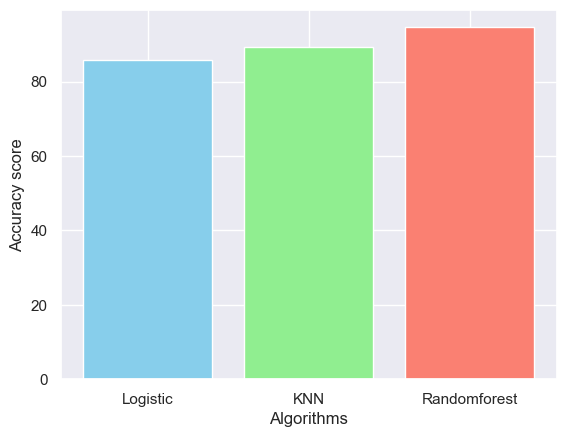

In [55]:
colors = ['skyblue','lightgreen','salmon']
plt.bar(['Logistic','KNN','Randomforest'], [lr_score,knn_score,rf_score], color = colors)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy score')
plt.show()